### Sample program for grid search of hyper parameters  

#### Import libraries  

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

#### Parameters  

In [12]:
csv_in = 'ai-end1-4.csv'

#### Read CSV file  

In [13]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(301, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      301 non-null    float64
 1   sex      301 non-null    float64
 2   bmi      301 non-null    float64
 3   bp       301 non-null    float64
 4   s1       301 non-null    float64
 5   s2       301 non-null    float64
 6   s3       301 non-null    float64
 7   s4       301 non-null    float64
 8   s5       301 non-null    float64
 9   s6       301 non-null    float64
 10  disease  301 non-null    float64
dtypes: float64(11)
memory usage: 26.0 KB
None


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease
0,-0.030942,0.050680,0.028284,0.070073,-0.126781,-0.106845,-0.054446,-0.047981,-0.030751,0.015491,170.0
1,0.001751,-0.044642,-0.065486,-0.005671,-0.007073,-0.019476,0.041277,-0.039493,-0.003304,0.007207,153.0
2,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059473,-0.083920,134.0
3,-0.078165,-0.044642,-0.016984,-0.012556,-0.000193,-0.013527,0.070730,-0.039493,-0.041180,-0.092204,90.0
4,0.023546,-0.044642,-0.036385,0.000068,0.001183,0.034698,-0.043401,0.034309,-0.033249,0.061054,146.0


#### Get X and y  

In [14]:
X = df.iloc[:, :-1]  # explanatory variables
y = df['disease']  # objective variable
print('X:', X.shape)
display(X.head())
print('y:', y.shape)
print(y.head())

X: (301, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,-0.030942,0.050680,0.028284,0.070073,-0.126781,-0.106845,-0.054446,-0.047981,-0.030751,0.015491
1,0.001751,-0.044642,-0.065486,-0.005671,-0.007073,-0.019476,0.041277,-0.039493,-0.003304,0.007207
2,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059473,-0.083920
3,-0.078165,-0.044642,-0.016984,-0.012556,-0.000193,-0.013527,0.070730,-0.039493,-0.041180,-0.092204
4,0.023546,-0.044642,-0.036385,0.000068,0.001183,0.034698,-0.043401,0.034309,-0.033249,0.061054


y: (301,)
0    170.0
1    153.0
2    134.0
3     90.0
4    146.0
Name: disease, dtype: float64


#### Make pipeline and set parameters for grid search   

In [15]:
abc=RandomForestClassifier(random_state=12)            

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 4, 6, None],
}

#### Preparation of objects for cross validation  

In [16]:
grid_cv = KFold(n_splits=4, shuffle=True, random_state=7)  # for grid search
gen_cv = KFold(n_splits=4, shuffle=True, random_state=12)  # for estimation of generalization performance

#### Define the grid search for hyperparameters  

In [17]:
gs = GridSearchCV(abc, param_grid , cv=grid_cv, scoring='neg_mean_squared_error')

#### Estimation of generalization performance  

In [18]:
%%time
nested_score = cross_val_score(gs, X=X, y=y, cv=gen_cv,
                               scoring='neg_mean_squared_error')
print(nested_score)
print(np.sqrt(-nested_score.mean()))

[-6000.93421053 -6962.         -7401.30666667 -7762.76      ]
83.8555318348065
CPU times: user 15.2 s, sys: 124 ms, total: 15.4 s
Wall time: 15.4 s


**Generalization performance (RMSE) / 汎化性能 (平均2乗誤差平方根): 0.675**  

#### Cross-validation to obtain the model with the best hyperparameter set (best estimator)  
- Note: gs_best is already fit to the whole data (X) in gs.fit(X, y)  

In [19]:
%%time
gs.fit(X, y)
gs_best = gs.best_estimator_

CPU times: user 4.21 s, sys: 19.7 ms, total: 4.23 s
Wall time: 4.23 s


In [20]:
print(gs_best)
for k,v in gs_best.get_params(deep=True).items():
    print(k, '->', v)

RandomForestClassifier(max_depth=4, random_state=12)
bootstrap -> True
ccp_alpha -> 0.0
class_weight -> None
criterion -> gini
max_depth -> 4
max_features -> auto
max_leaf_nodes -> None
max_samples -> None
min_impurity_decrease -> 0.0
min_impurity_split -> None
min_samples_leaf -> 1
min_samples_split -> 2
min_weight_fraction_leaf -> 0.0
n_estimators -> 100
n_jobs -> None
oob_score -> False
random_state -> 12
verbose -> 0
warm_start -> False


#### Show feature importances of the best model  

In [21]:
print(pd.Series(gs_best.feature_importances_, index=X.columns))

age    0.109510
sex    0.014262
bmi    0.135725
bp     0.111976
s1     0.100390
s2     0.104474
s3     0.129731
s4     0.066043
s5     0.121775
s6     0.106114
dtype: float64


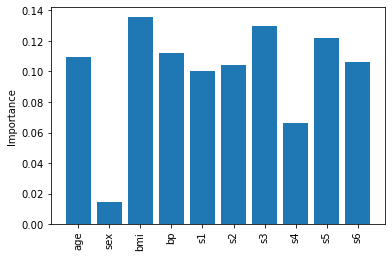

In [22]:
plt.bar(X.columns, gs_best.feature_importances_)
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

**Features (explanatory variable) with the largest importance: alcohol**  
**重要度が最大の説明変数(特徴量): alcohol**  